## Camera Calibration

### Finding calibration matrix and distortion coefficients

>This section defines functions for finding the calibration matrix and distortion coefficients of given calibration images in the ```camera_cal``` directory.

In [1]:
from enum import Enum

class CoefficientsT(Enum):
    RET=0,
    MTX=1,
    DIST=2

coeff_ret = CoefficientsT.RET
coeff_mtx = CoefficientsT.MTX
coeff_dist = CoefficientsT.DIST

In [2]:
Coefficients = {
    coeff_ret : None,
    coeff_mtx : None,
    coeff_dist : None
}

In [3]:
def Points(images, horizontal, vertical):
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((vertical * horizontal, 3), np.float32)
    objp[:,:2] = np.mgrid[0:horizontal, 0:vertical].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    
    for img in images.values():
        
        # Get images
        #img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_size = (img.shape[1], img.shape[0])

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (horizontal, vertical), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

    return img_size, objpoints, imgpoints
    


***

### Undistortion

>This section defines functions for undistorting an image based on the calibration discovered in the previous section.

In [4]:
def Calibrate(calImages, horizontalCount, verticalCount):
    
    img_size, objpoints, imgpoints = Points(calImages, horizontalCount-1, verticalCount-1)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    
    Coefficients[coeff_ret] = ret
    Coefficients[coeff_mtx] = mtx
    Coefficients[coeff_dist]  = dist

In [5]:
def UndistortAll(test_images, cal_images, horizontal, vertical):
    
    undistorted = []
    
    ret, mtx, dist = Get_Matrix(cal_images, horizontal, vertical)
    
    for fname in test_images:
    
        img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
        dst = cv2.undistort(img, mtx, dist, None, mtx)

        undistorted.append(dst)
        
    return undistorted
        

In [6]:
def UndistortLoadedImage(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return cv2.undistort(img, Coefficients[coeff_mtx], Coefficients[coeff_dist], None, Coefficients[coeff_mtx])
    

In [7]:
def UndistortUnloadedImage(image):
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    return cv2.undistort(img, Coefficients[coeff_mtx], Coefficients[coeff_dist], None, Coefficients[coeff_mtx])

***

## Manipulation

### Apply color and gradient thresholds

>This section defines functions for applying color and gradient thresholds to an undistorted image to find the lane lines.

***

### Birds-eye view perspective transform

>This section defines functions for transforming the perspective of an image to birds-eye.

***

## Find lane line pixels

### Sliding windows

>In this section the sliding window method of lane pixel detection is implemented.

***

### Search from prior

>In this section the search from prior method of lane pixel detection is implemented.

***

### Convolution

>In this section the convolution method of lane pixel detection is implemented.

***

## Polynomial Fitting

### Fit 2nd degree polynomial to left and right lane lines

>This section defines functions for fitting a second order polynomial to the lane pixels for left and right lanes discovered from the previous section.

***

## Lane Curvature

### Curvature

>**This is a description**

***

### Center deviation

>**This is a description**

***

## Lane Boundary Annotation

### Annotate lane boundaries

>**This is a description**

***

## Helpers

>This section defines helper functions for various needs

In [8]:
def GetImagesOS(rootDir, validExtensions):
    
    '''
    Description: Finds all image files in the rootDir with valid extensions and returns the following dictionaries:
                 paths - {Image filename without extension, Full path to image}
                 extensions - {Image filename without extension, Image extension}
                 imgs - {Image filename without extension, matplotlib.image object of the image}
    '''
    
    paths = {}
    extensions = {}
    imgs = {}
    indexes = []
    
    if(rootDir == ''):
        files = os.listdir(".")
    else:
        files = os.listdir(rootDir)
    
    for file in files:
        
        if(rootDir == ''):
            
            if(os.path.isfile(".\\" + file)):
                
                ext = file[-3:]
                
                if ext in validExtensions:
                    
                    filename = file[:len(file)-4]
                    indexes.append(filename)
                    paths[filename] = ".\\" + file
                    extensions[filename] = ext
                    imgs[filename] = cv2.imread(".\\" + file)
            
        else:
            
            if os.path.isfile(rootDir + '\\' + file):
                
                ext = file[-3:]
                
                if ext in validExtensions:
                    
                    filename = file[:len(file)-4]
                    indexes.append(filename)
                    paths[filename] = rootDir + "\\" + file
                    extensions[filename] = ext
                    imgs[filename] = cv2.imread(rootDir + "\\" + file)
                    
    return indexes, paths, extensions, imgs

In [9]:
def GetImagesGlob(rootDir, filename, extension):
    
    if rootDir == '':
        return glob.glob(".\\" + filename + "*." + extension)
    else:
        return glob.glob(rootDir + "\\" + filename + "*." + extension)

In [10]:
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

***

## Implementation

>This section shows the pipeline implementation using the functions defined above.

In [14]:
# Make a list of calibration images
calIndexes, calPaths, calExtensions, calImages = GetImagesOS('camera_cal', ('jpg', 'png'))
# Make a list of test images
testIndexes, testPaths, testExtensions, testImages = GetImagesOS('test_images', ('jpg', 'png'))

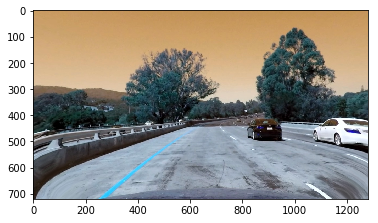

In [13]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

verticalCount = 7
horizontalCount = 9

Calibrate(calImages, horizontalCount, verticalCount)

undist = UndistortLoadedImage(testImages[testIndexes[2]])
plt.imshow(bgr2rgb(undist))
plt.show()

# Make a list of calibration images
#cal_images = glob.glob('camera_cal/calibration*.jpg')
#test_images = glob.glob('test_images//test*.jpg')

#imgcount = 1

#undist_images = Undistort(test_images, cal_images, horizontal, vertical)

#for undist in undist_images:
    
    #plt.imsave("test_images\\undistorted\\test{}.jpg".format(imgcount), undist)
    #imgcount += 1
    
    
    
    
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#     f.tight_layout()
#     ax1.imshow(img)
#     ax1.set_title('Original Image', fontsize=50)
#     ax2.imshow(undistorted[currImage])
#     ax2.set_title('Undistorted Image', fontsize=50)
#     plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        

***

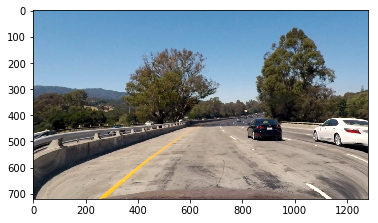

In [12]:
plt.imshow(undist)
plt.show()